# 模型正则化Regularization

模型正则化：限制参数的大小

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
def PolyReg(degree):
    return Pipeline([
        ("ploy",PolynomialFeatures(degree=degree)),
        ("std_scalar",StandardScaler()),
        ("lin_reg",lin_reg)
    ])

In [3]:
from sklearn.metrics import mean_squared_error

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [8]:
# 多项式回归
poly100_reg = PolyReg(degree=100)
poly100_reg.fit(X_train,y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test,y100_predict)

14075796434.50641

In [9]:
lin_reg.coef_

array([ 1.32772947e+11,  1.62336964e+01,  9.44440994e+01, -9.23553073e+02,
       -4.37590062e+03,  1.80162849e+04,  2.55540660e+04,  5.44553290e+03,
        2.94210788e+06, -4.91285861e+06, -9.44092071e+07,  8.51207557e+07,
        1.43562138e+09, -8.44559533e+08, -1.33965589e+10,  6.20493379e+09,
        8.31526382e+10, -3.64701879e+10, -3.52611781e+11,  1.66179730e+11,
        1.01296492e+12, -5.44794423e+11, -1.86379738e+12,  1.17004585e+12,
        1.81178242e+12, -1.36347156e+12, -2.74046539e+10,  1.96618357e+11,
       -1.54759638e+12,  1.25913369e+12,  2.14742767e+11, -3.88486221e+11,
        1.42542067e+12, -1.28056117e+12,  3.01205877e+11, -1.26001588e+11,
       -1.12939655e+12,  1.16126166e+12, -9.89310162e+11,  9.96042116e+11,
        1.17978550e+11, -2.46283281e+11,  1.02512274e+12, -1.21407140e+12,
        9.93801259e+11, -1.06265739e+12,  8.96466521e+10, -6.80297911e+10,
       -6.78476549e+11,  9.22158418e+11, -9.79606157e+11,  1.23853634e+12,
       -6.26140094e+11,  

### 上面的第一个系数1.32772947e+11非常大
![](模型正则化.png)

theta0不需要加入，因为theta0与曲线陡峭程度不同    
加入1/2的原因，是因为要求导，与1/2抵消，方便计算  
α是新的超参数，指的是后面一坨占目标函数的比值

![](岭回归.png)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 + np.random.normal(0,1,size=100)

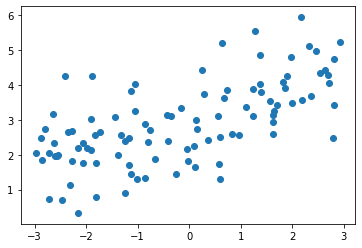

In [11]:
plt.scatter(x,y)
plt.show()

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
def PolyReg(degree):
    return Pipeline([
        ("ploy",PolynomialFeatures(degree=degree)),
        ("std_scalar",StandardScaler()),
        ("lin_reg",lin_reg)
    ])

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [14]:
from sklearn.metrics import mean_squared_error
# 多项式回归
poly20_reg = PolyReg(degree=20)
poly20_reg.fit(X_train,y_train)
y20_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test,y20_predict)

2955843907.327353

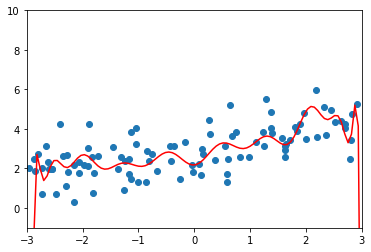

In [15]:
X_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = poly20_reg.predict(X_plot)

plt.scatter(x,y)
plt.plot(X_plot[:,0],y_plot,color='r')
plt.axis([-3,3,-1,10])
plt.show()

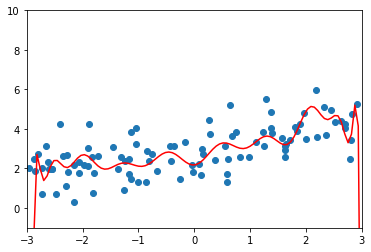

In [16]:
def plot_model(model):
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(X_plot)

    plt.scatter(x,y)
    plt.plot(X_plot[:,0],y_plot,color='r')
    plt.axis([-3,3,-1,10])
    plt.show()

plot_model(poly20_reg)

## 使用岭回归

In [17]:
from sklearn.linear_model import Ridge

In [18]:
ridge = Ridge(alpha=1)

In [25]:
def RidgeReg(degree,alpha):
    return Pipeline([
        ("ploy",PolynomialFeatures(degree=degree)),
        ("std_scalar",StandardScaler()),
        ("ridge_reg",Ridge(alpha=alpha))
    ])

In [26]:
ridge1 = RidgeReg(20,0.0001)
ridge1.fit(X_train,y_train)

y1_predict = ridge2.predict(X_test)
mean_squared_error(y_test,y1_predict)

1.3233492754136291

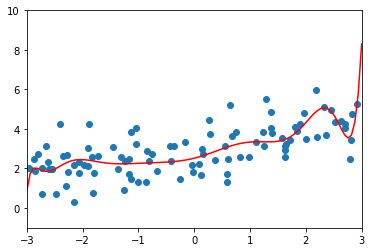

In [27]:
plot_model(ridge1)

In [28]:
ridge2 = RidgeReg(20,1)
ridge2.fit(X_train,y_train)

y2_predict = ridge3.predict(X_test)
mean_squared_error(y_test,y2_predict)

1.3233492754136291

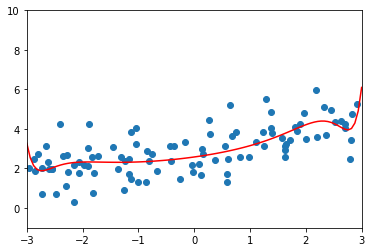

In [29]:
plot_model(ridge2)

In [30]:
ridge3 = RidgeReg(20,100)
ridge3.fit(X_train,y_train)

y3_predict = ridge3.predict(X_test)
mean_squared_error(y_test,y3_predict)

1.3233492754136291

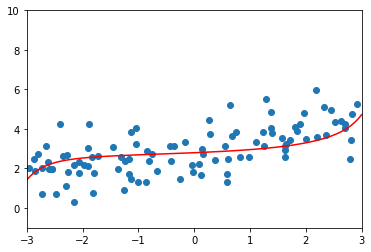

In [31]:
plot_model(ridge3)

In [32]:
ridge4 = RidgeReg(20,100000)
ridge4.fit(X_train,y_train)

y4_predict = ridge4.predict(X_test)
mean_squared_error(y_test,y4_predict)

1.8360988778885547

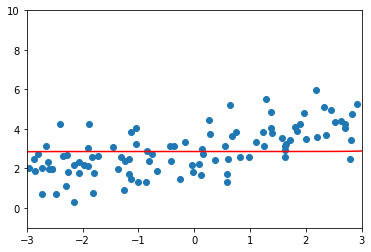

In [33]:
plot_model(ridge4)